The Data
We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

Feature Columns
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../DATA/kc_house_data.csv')

In [3]:
df.head(4)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

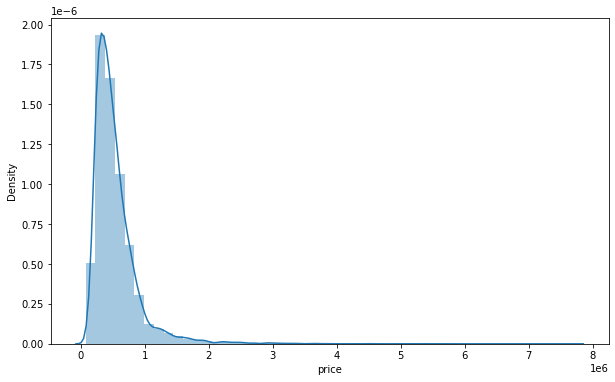

In [6]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

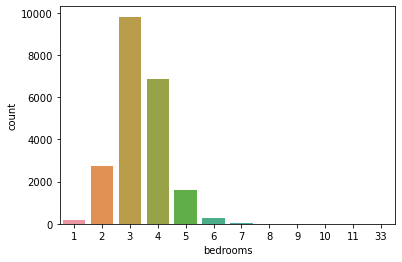

In [7]:
sns.countplot(df['bedrooms'])

In [9]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

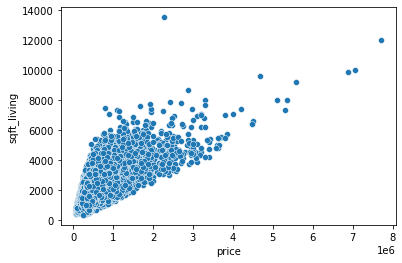

In [10]:
sns.scatterplot(x='price',y='sqft_living',data=df)

<AxesSubplot:xlabel='price', ylabel='long'>

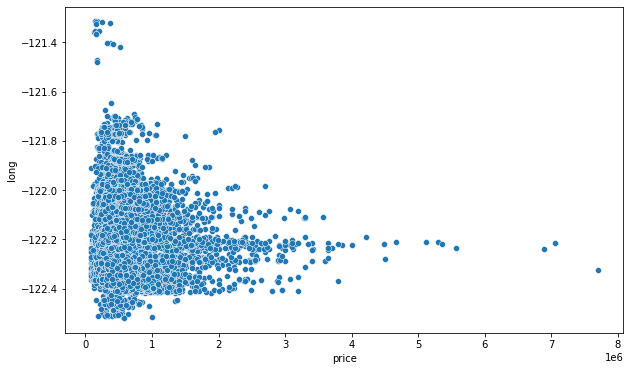

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='long',data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

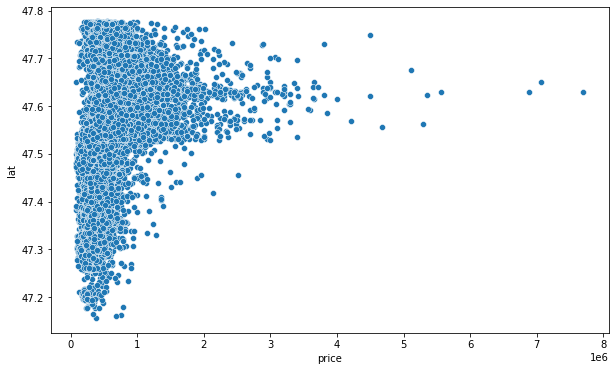

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='lat',data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

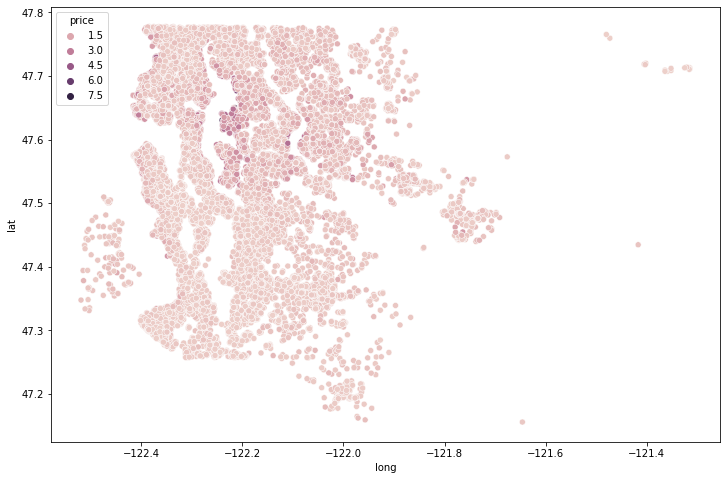

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [22]:
len(df)*0.01

215.97

In [23]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

In [24]:
non_top_1_perc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868


<AxesSubplot:xlabel='long', ylabel='lat'>

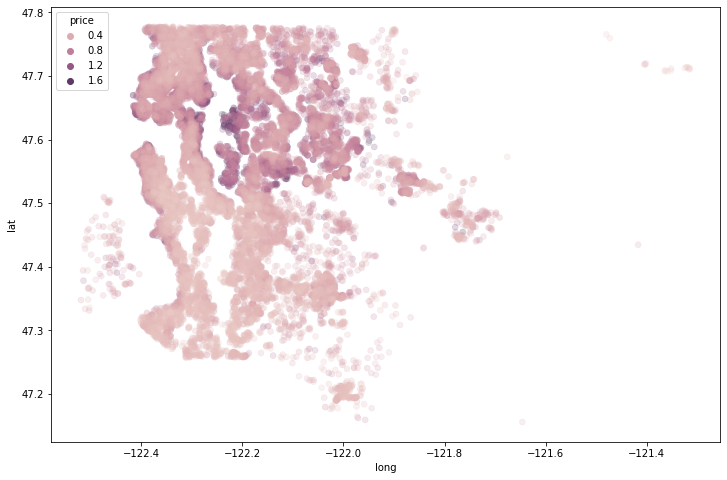

In [26]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,edgecolor=None,alpha=0.2,hue='price')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

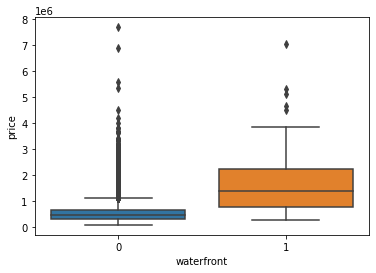

In [27]:
sns.boxplot(x='waterfront',y='price',data=df)

# Feature Engineering

In [28]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [29]:
df = df.drop('id',axis=1)

In [30]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [31]:
df['date'] = pd.to_datetime(df['date'])

In [32]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [35]:
df['year'] = df['date'].apply(lambda date:date.year)
df['month'] = df['date'].apply(lambda date:date.month)

In [36]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='month', ylabel='price'>

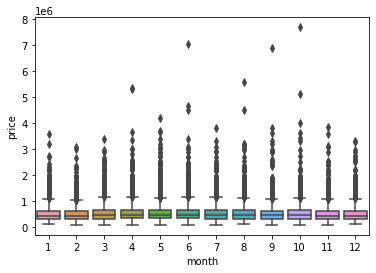

In [37]:
sns.boxplot(x='month',y='price',data=df)

<AxesSubplot:xlabel='month'>

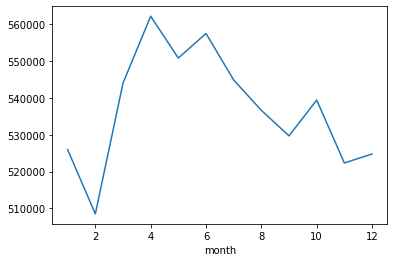

In [39]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

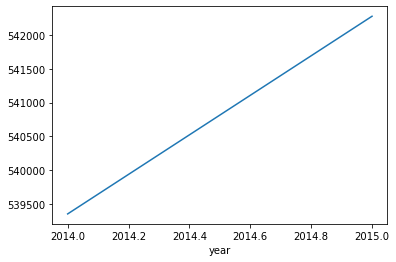

In [40]:
df.groupby('year').mean()['price'].plot()

In [41]:
df = df.drop('date',axis=1)

In [42]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [43]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [44]:
df = df.drop('zipcode',axis=1)

In [45]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [46]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()

In [51]:
X_train = scaler.fit_transform(X_train)

In [52]:
X_test = scaler.transform(X_test)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [55]:
model = Sequential()

In [56]:
X_train.shape

(15117, 19)

In [57]:
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [58]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 3ms/step - loss: 430237253632.0000 - val_loss: 418903523328.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 429170163712.0000 - val_loss: 415332859904.0000
Epoch 3/400
119/119 [==============================] - 0s 1ms/step - loss: 415338201088.0000 - val_loss: 384140967936.0000
Epoch 4/400
119/119 [==============================] - 0s 1ms/step - loss: 349335945216.0000 - val_loss: 277401993216.0000
Epoch 5/400
119/119 [==============================] - 0s 1ms/step - loss: 210404540416.0000 - val_loss: 134280765440.0000
Epoch 6/400
119/119 [==============================] - 0s 1ms/step - loss: 111956934656.0000 - val_loss: 96348168192.0000
Epoch 7/400
119/119 [==============================] - 0s 1ms/step - loss: 98521636864.0000 - val_loss: 94554906624.0000
Epoch 8/400
119/119 [==============================] - 0s 1ms/step - loss: 96842694656.0000 - val_loss: 93039296512.0000
Epoch 9/400
119/119 [

119/119 [==============================] - 0s 1ms/step - loss: 38452580352.0000 - val_loss: 37246242816.0000
Epoch 69/400
119/119 [==============================] - 0s 1ms/step - loss: 38319546368.0000 - val_loss: 37085646848.0000
Epoch 70/400
119/119 [==============================] - 0s 1ms/step - loss: 38183632896.0000 - val_loss: 36943740928.0000
Epoch 71/400
119/119 [==============================] - 0s 1ms/step - loss: 37998596096.0000 - val_loss: 36851433472.0000
Epoch 72/400
119/119 [==============================] - 0s 1ms/step - loss: 37854543872.0000 - val_loss: 36764737536.0000
Epoch 73/400
119/119 [==============================] - 0s 1ms/step - loss: 37775015936.0000 - val_loss: 36525613056.0000
Epoch 74/400
119/119 [==============================] - 0s 1ms/step - loss: 37621583872.0000 - val_loss: 36394995712.0000
Epoch 75/400
119/119 [==============================] - 0s 1ms/step - loss: 37469003776.0000 - val_loss: 36260302848.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 1ms/step - loss: 33171447808.0000 - val_loss: 31798173696.0000
Epoch 136/400
119/119 [==============================] - 0s 1ms/step - loss: 33163724800.0000 - val_loss: 31747745792.0000
Epoch 137/400
119/119 [==============================] - 0s 1ms/step - loss: 33149890560.0000 - val_loss: 31743815680.0000
Epoch 138/400
119/119 [==============================] - 0s 1ms/step - loss: 33086134272.0000 - val_loss: 31693426688.0000
Epoch 139/400
119/119 [==============================] - 0s 1ms/step - loss: 33035757568.0000 - val_loss: 31649613824.0000
Epoch 140/400
119/119 [==============================] - 0s 1ms/step - loss: 33027252224.0000 - val_loss: 31572684800.0000
Epoch 141/400
119/119 [==============================] - 0s 1ms/step - loss: 33024268288.0000 - val_loss: 31529824256.0000
Epoch 142/400
119/119 [==============================] - 0s 1ms/step - loss: 32981020672.0000 - val_loss: 31637215232.0000
Epoch 143/400
11

119/119 [==============================] - 0s 1ms/step - loss: 31666704384.0000 - val_loss: 30018818048.0000
Epoch 202/400
119/119 [==============================] - 0s 1ms/step - loss: 31651041280.0000 - val_loss: 29967339520.0000
Epoch 203/400
119/119 [==============================] - 0s 1ms/step - loss: 31628371968.0000 - val_loss: 29955866624.0000
Epoch 204/400
119/119 [==============================] - 0s 1ms/step - loss: 31815665664.0000 - val_loss: 29953327104.0000
Epoch 205/400
119/119 [==============================] - 0s 1ms/step - loss: 31605526528.0000 - val_loss: 29859368960.0000
Epoch 206/400
119/119 [==============================] - 0s 1ms/step - loss: 31598694400.0000 - val_loss: 29830754304.0000
Epoch 207/400
119/119 [==============================] - 0s 2ms/step - loss: 31550304256.0000 - val_loss: 29870600192.0000
Epoch 208/400
119/119 [==============================] - 0s 1ms/step - loss: 31549913088.0000 - val_loss: 29861591040.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 30813292544.0000 - val_loss: 28911570944.0000
Epoch 268/400
119/119 [==============================] - 0s 1ms/step - loss: 30770706432.0000 - val_loss: 28975437824.0000
Epoch 269/400
119/119 [==============================] - 0s 1ms/step - loss: 30774865920.0000 - val_loss: 29015363584.0000
Epoch 270/400
119/119 [==============================] - 0s 1ms/step - loss: 30793084928.0000 - val_loss: 28867565568.0000
Epoch 271/400
119/119 [==============================] - 0s 975us/step - loss: 30787528704.0000 - val_loss: 28870127616.0000
Epoch 272/400
119/119 [==============================] - 0s 984us/step - loss: 30736504832.0000 - val_loss: 28997758976.0000
Epoch 273/400
119/119 [==============================] - 0s 994us/step - loss: 30741264384.0000 - val_loss: 28826361856.0000
Epoch 274/400
119/119 [==============================] - 0s 1ms/step - loss: 30737342464.0000 - val_loss: 28850188288.0000
Epoch 275/400
119/119 [=

119/119 [==============================] - 0s 1ms/step - loss: 30178553856.0000 - val_loss: 28146821120.0000
Epoch 334/400
119/119 [==============================] - 0s 954us/step - loss: 30185719808.0000 - val_loss: 28181608448.0000
Epoch 335/400
119/119 [==============================] - 0s 1ms/step - loss: 30176577536.0000 - val_loss: 28118900736.0000
Epoch 336/400
119/119 [==============================] - 0s 1ms/step - loss: 30200483840.0000 - val_loss: 28119459840.0000
Epoch 337/400
119/119 [==============================] - 0s 964us/step - loss: 30155726848.0000 - val_loss: 28153448448.0000
Epoch 338/400
119/119 [==============================] - 0s 993us/step - loss: 30152251392.0000 - val_loss: 28121956352.0000
Epoch 339/400
119/119 [==============================] - 0s 979us/step - loss: 30145556480.0000 - val_loss: 28075669504.0000
Epoch 340/400
119/119 [==============================] - 0s 960us/step - loss: 30181593088.0000 - val_loss: 28120205312.0000
Epoch 341/400
119/11

Epoch 399/400
119/119 [==============================] - 0s 990us/step - loss: 29669720064.0000 - val_loss: 27475095552.0000
Epoch 400/400
119/119 [==============================] - 0s 1ms/step - loss: 29662648320.0000 - val_loss: 27510575104.0000


In [59]:
model.history.history

{'loss': [430237253632.0,
  429170163712.0,
  415338201088.0,
  349335945216.0,
  210404540416.0,
  111956934656.0,
  98521636864.0,
  96842694656.0,
  95242190848.0,
  93607264256.0,
  92002525184.0,
  90396254208.0,
  88662024192.0,
  86911975424.0,
  85072764928.0,
  83136487424.0,
  81154973696.0,
  79073296384.0,
  76948226048.0,
  74657136640.0,
  72298545152.0,
  69948317696.0,
  67579535360.0,
  65222234112.0,
  62927446016.0,
  60713672704.0,
  58670694400.0,
  56860446720.0,
  55250354176.0,
  53905330176.0,
  52714401792.0,
  51734175744.0,
  50847899648.0,
  50081505280.0,
  49391116288.0,
  48764309504.0,
  48187215872.0,
  47638659072.0,
  47104864256.0,
  46639513600.0,
  46114480128.0,
  45708447744.0,
  45255417856.0,
  44824064000.0,
  44459872256.0,
  44105932800.0,
  43720769536.0,
  43468734464.0,
  43077935104.0,
  42764759040.0,
  42494099456.0,
  42165714944.0,
  41869905920.0,
  41605558272.0,
  41273110528.0,
  40996192256.0,
  40725168128.0,
  40461877248.0,


In [60]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

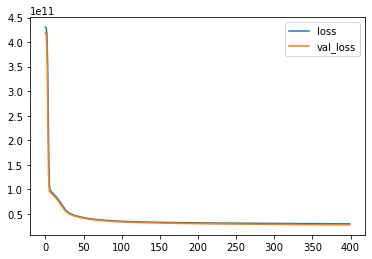

In [61]:
losses.plot()

In [62]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [65]:
predictions = model.predict(X_test)

In [66]:
mean_absolute_error(y_test,predictions)

102993.28818600501